In [87]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [80]:
nrows = -1 # to avoid loading full file each time
if nrows != -1 :
    data = pd.read_csv('data.csv', sep=';', nrows = nrows)
else:
     data= pd.read_csv('data.csv', sep=';', dtype={'CODGEO': object})


In [3]:
data.shape

(34970, 96)

In [4]:
data.head()

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,...,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
0,01001,L'Abergement-Clémenciat,84,1,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,84,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,84,1,1,2,1,1,4,4,...,0,0,0,0,1,3,0,0,0,0
3,01005,Ambérieux-en-Dombes,84,1,0,0,0,0,3,4,...,0,0,0,0,0,0,0,0,0,0
4,01006,Ambléon,84,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#data = data[~data['REG'].isin(['84'])]

In [7]:
data.shape

(34970, 96)

In [79]:
data[data['NB_F101_NB_AIREJEU']==111]

,insee,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,...,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
29274,75056,Paris,11,75,84,111,81,82,57,78,...,0,0,0,0,83,401,58,18,145,184


In [9]:
data['REG'].unique()

array([84, 32, 93, 44, 76, 28, 75, 24, 27, 53, 94, 52, 11,  1,  2,  3,  4,
        6], dtype=int64)

In [81]:
# removing Guadeloupe, Martinique, Guyane, La réunion and Mayotte
data = data[~data['REG'].isin(['1','2','3','4','6'])]

In [82]:
data['REG'].unique()

array([84, 32, 93, 44, 76, 28, 75, 24, 27, 53, 94, 52, 11], dtype=int64)

In [106]:
# manage region names
regions = {
    11:'ILE DE FRANCE',
    24:'CENTRE VAL DE LOIRE',
    27:'BOURGOGNE FRANCHE COMTE',
    28:'NORMANDIE',
    32:'HAUTS DE FRANCE',
    44:'GRAND EST',
    52:'PAYS DE LA LOIRE',
    53:'BRETAGNE',
    75:'NOUVELLE AQUITAINE',
    76:'OCCITANIE',
    84:'AUVERGNE RHONE ALPES',
    93:'PROVENCE ALPES COTE D AZUR',
    94:'CORSE'
}

In [108]:
data['Region'] = data['REG'].map(regions)

In [109]:
data['Region'].head()

0    AUVERGNE RHONE ALPES
1    AUVERGNE RHONE ALPES
2    AUVERGNE RHONE ALPES
3    AUVERGNE RHONE ALPES
4    AUVERGNE RHONE ALPES
Name: Region, dtype: object

In [48]:
#data = data[data['REG'].isin(['84'])]

In [83]:
#try to graph the number of equipment compared to avg
data['mean_piscine'] = data['NB_F101'] - data['NB_F101'].mean()

In [84]:
data['mean_piscine']

0       -0.10347
1       -0.10347
2        0.89653
3       -0.10347
4       -0.10347
          ...   
34836   -0.10347
34837   -0.10347
34838    0.89653
34839   -0.10347
34840   -0.10347
Name: mean_piscine, Length: 34841, dtype: float64

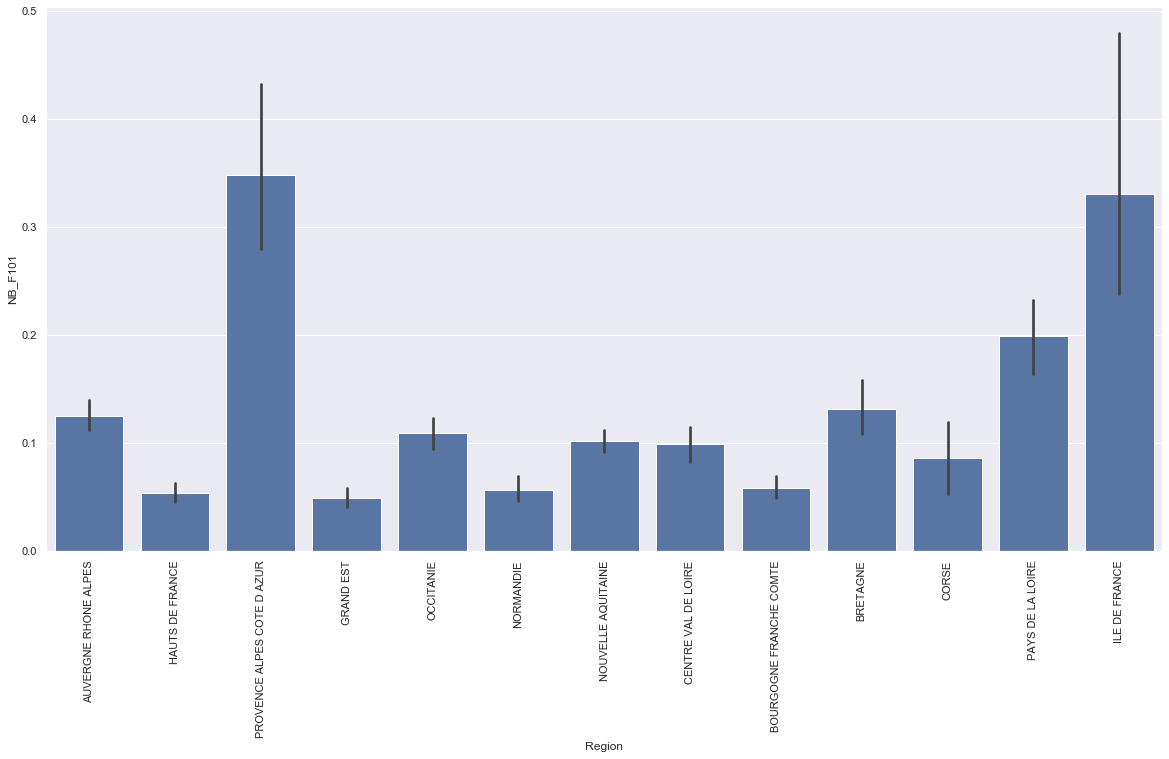

In [111]:
fig=plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1)
snsbp = sns.barplot(data=data,x='Region',y='NB_F101',ax=ax1,color='b');
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90);

In [112]:
# display top 10 cities with most swimmingpool
top_10 = data.sort_values(by='NB_F101', ascending=False)

In [113]:
top_10.head()

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,...,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES,mean_piscine,Region
29274,75056,Paris,11,75,84,111,81,82,57,78,...,0,0,83,401,58,18,145,184,83.89653,ILE DE FRANCE
4347,13055,Marseille,93,13,29,33,18,20,62,78,...,0,0,11,51,15,1,21,30,28.89653,PROVENCE ALPES COTE D AZUR
11812,31555,Toulouse,76,31,14,26,11,12,79,101,...,2,2,6,32,8,1,10,18,13.89653,OCCITANIE
27110,69123,Lyon,84,69,14,22,9,11,27,47,...,0,0,15,92,12,1,18,29,13.89653,AUVERGNE RHONE ALPES
4293,13001,Aix-en-Provence,93,13,11,17,5,5,20,20,...,0,0,4,16,7,1,5,7,10.89653,PROVENCE ALPES COTE D AZUR


In [ ]:
fig=plt.figure(figsize=(20,10))
sns.set(font_scale=2)
snsbp = sns.barplot(data=top_10, y='LIBGEO', x='NB_F101', color='b', capsize=0.5);
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90 ,minor=True);

In [68]:
jsonfile = 'communes-20190101.json'
map_df = gpd.read_file(jsonfile)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df.head()

In [69]:
col_names = data.columns.values
col_names[0] = 'insee'
data.columns = col_names

In [70]:
#map_df[map_df['insee']=='74208']
#data = data[data['insee']=='74208']

In [71]:
merged = map_df.merge(data, on='insee')

In [74]:
# create a function to plot on the map
def plot_column(columnname, maptitle, color=plt.cm.Blues):
    vmin, vmax = int(np.min(merged[columnname])), int(np.max(merged[columnname]))
    fig, ax = plt.subplots(1, figsize=(20, 10))
    merged.plot(column=columnname, cmap=color, ax=ax, scheme='Quantiles', legend=True, k=1000) #plt.cm.plasma 'OrRd'
    ax.set_title(maptitle, fontsize=25)

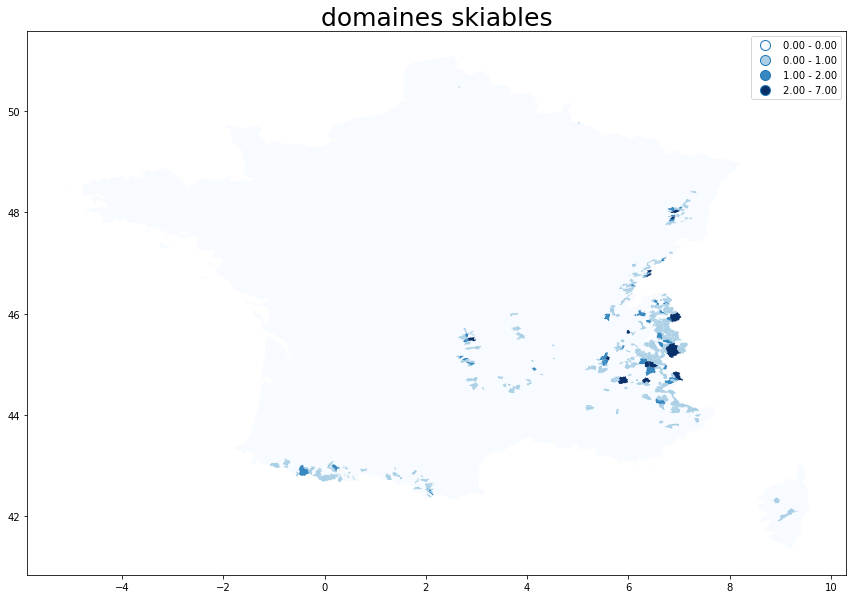

In [78]:
plot_column('NB_F105','domaines skiables')